In [1]:
import numpy as np
import json

import tqdm as tqdm

from simplequantnetsim.protocols import MPC_protocol, MPG_protocol, SP_protocol
from simplequantnetsim.graph import network, set_edge_length, update_graph_params

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
mkr = ["x", "+", "d", "o", "1", "2"] + ["x"] * 100
dashs = ["-.", "--", ":", "-"] + ["-"] * 100
cols = ["gray", "g", "b", "orange", "r", "k", "purple"] + ["k"] * 100
linewidth = 2.2
mks = 5.5
fontsize = 14

In [3]:
import numpy as np
import networkx as nx
import json

import tqdm as tqdm

from simplequantnetsim.protocols import MPC_protocol, MPG_protocol, SP_protocol
from simplequantnetsim.graph import network, set_edge_length, update_graph_params, reset_graph_state, reset_graph_usage, remove_nodes

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from networkx.drawing.layout import *
from networkx.readwrite import json_graph

In [4]:
draw_options = {
    "l": {
        "with_labels": True,
        "node_size": 1000,
        "font_size": 10,
        "label_offset": 0.25,
        "label_size": 8
    }, # 5x5
    "m": {
        "with_labels": True,
        "node_size": 500,
        "font_size": 8,
        "label_offset": 0.35,
        "label_size": 6
    }, # 9x9
    "s": {
        "with_labels": False,
        "node_size": 250,
        "font_size": 0,
        "label_offset": 0,
        "label_size": 6
    }, # 15x15
    "xs": {
        "with_labels": False,
        "node_size": 80,
        "font_size": 0,        
        "label_offset": 0,        
        "label_size": 4
    } # 25x25
}

def draw_network(D, size="l"):
    usage = nx.get_node_attributes(D, "usage_fraction")
    pos = dict((n, n) for n in D.nodes())  # grid layout

    cmap = plt.cm.Blues
    cmap.set_under(color="white")  # display zero fraction (under 0.0000001) as white

    nc = nx.draw(
        D,
        pos=pos,
        with_labels=draw_options[size]["with_labels"],
        node_size=draw_options[size]["node_size"],
        font_size=draw_options[size]["font_size"],
        node_color=list(usage.values()),
        vmin=0.0000001,
        cmap=cmap,
    )

    # colorbar
    ax = plt.gca()
    PCM = ax.get_children()[0]
    cbar = plt.colorbar(PCM, ax=ax)
    cbar.set_label(
        "Usage fraction (/rep)", rotation=270, fontsize=12, labelpad=15
    )

    # usage labels
    pos_usage = {}
    for node, coords in pos.items():
        pos_usage[node] = (coords[0] + draw_options[size]["label_offset"], coords[1] - draw_options[size]["label_offset"])

    rounded_usage = {}
    for node, attr in usage.items():
        rounded_usage[node] = round(attr, 2)

    nx.draw_networkx_labels(D, pos_usage, labels=rounded_usage, font_size=draw_options[size]["label_size"])

# ER against length for the MPC, MPG, and SP protocols

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\ROG\Desktop\quantum_repeaters\simplequantnetsim\protocols.py:95: FutureWarning: steiner_tree will change default method from 'kou' to 'mehlhorn'in version 3.2.
Set the `method` kwarg to remove this warning.
  success = success_protocol(G, H, users, used_nodes, count_fusion)  # protocol specific
100%|██████████| 5/5 [05:21<00:00, 64.35s/it]


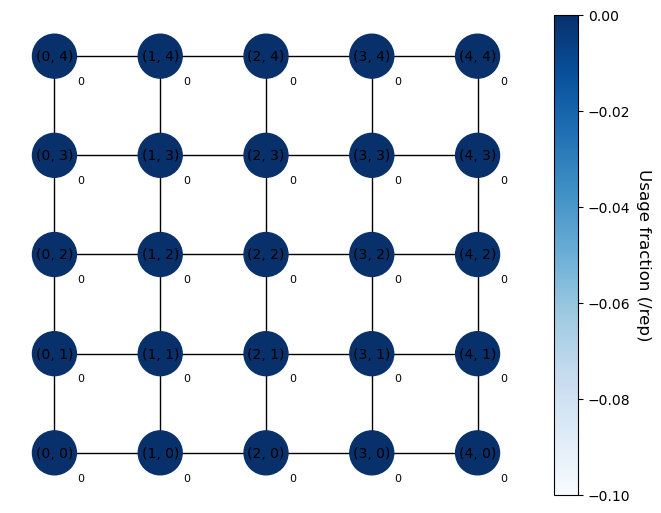

In [13]:
size = 5
center = (size - 1) / 2
G = network(size, size)
nodes = list(G.nodes)
protocols = [MPC_protocol, MPG_protocol, SP_protocol]
length = 10

timesteps = 1000
reps = 200
Q_c = 1
p_op = 1
loss_dB = 0.2

update_graph_params(G, Qc=Q_c)

# n = 1 # 靠近中心的程度，0就是在角落，1就是更靠近中心根号2格

# users = [
#     (center, center),
#     (n, n),
#     (n, size - 1 - n),
#     (size - 1 - n, 0),
#     (size - 1 - n, size - 1 - n),
# ]  # "source" for SP & MPG will be the central node

users_1 = [
    (center, center),
    (0, 0),
    (0, 4),
    (4, 0),
    (4, 4),
]  # "source" for SP & MPG will be the central node

users_2 = [
    (center, center),
    (0, 0),
    (0, 4),
    (4, 0),
    (4, 4),
    (1, 1),
    (1, 3),
    (3, 1),
    (3, 3)
]  # "source" for SP & MPG will be the central node

users_3 = [
    (center, center),
    (0, 0),
    (0, 4),
    (4, 0),
    (4, 4),
    (1, 1),
    (1, 3),
    (3, 1),
    (3, 3),
    (0, 2),
    (2, 0),
    (2, 4),
    (4, 2)
]  # "source" for SP & MPG will be the central node

users_4 = [
    (center, center),
    (0, 0),
    (0, 4),
    (4, 0),
    (4, 4),
    (1, 1),
    (1, 3),
    (3, 1),
    (3, 3),
    (0, 2),
    (2, 0),
    (2, 4),
    (4, 2),
    (0, 1),
    (1, 4),
    (3, 0),
    (4, 3)
]  # "source" for SP & MPG will be the central node

users_5 = [
    (center, center),
    (0, 0),
    (0, 4),
    (4, 0),
    (4, 4),
    (1, 1),
    (1, 3),
    (3, 1),
    (3, 3),
    (0, 2),
    (2, 0),
    (2, 4),
    (4, 2),
    (0, 1),
    (1, 4),
    (3, 0),
    (4, 3),
    (0, 3),
    (1, 0),
    (3, 4),
    (4, 1)
]  # "source" for SP & MPG will be the central node

users_gruop = [users_1, users_2, users_3, users_4, users_5]

ER = np.zeros((len(protocols), len(users_gruop)))

set_edge_length(G, length, p_op=p_op, loss_dB=loss_dB)

draw_network(G, "l")
plt.savefig("figures/usage.png", dpi=600, bbox_inches="tight")

for i, users in enumerate(tqdm.tqdm(users_gruop)):  # tqdm_notebook
    for j, function in enumerate(protocols):
        er, multipartite_gen_time, links_used = function(G, users, timesteps=timesteps, reps=reps, count_fusion=True)
        ER[j, i] += er

## Plot figure

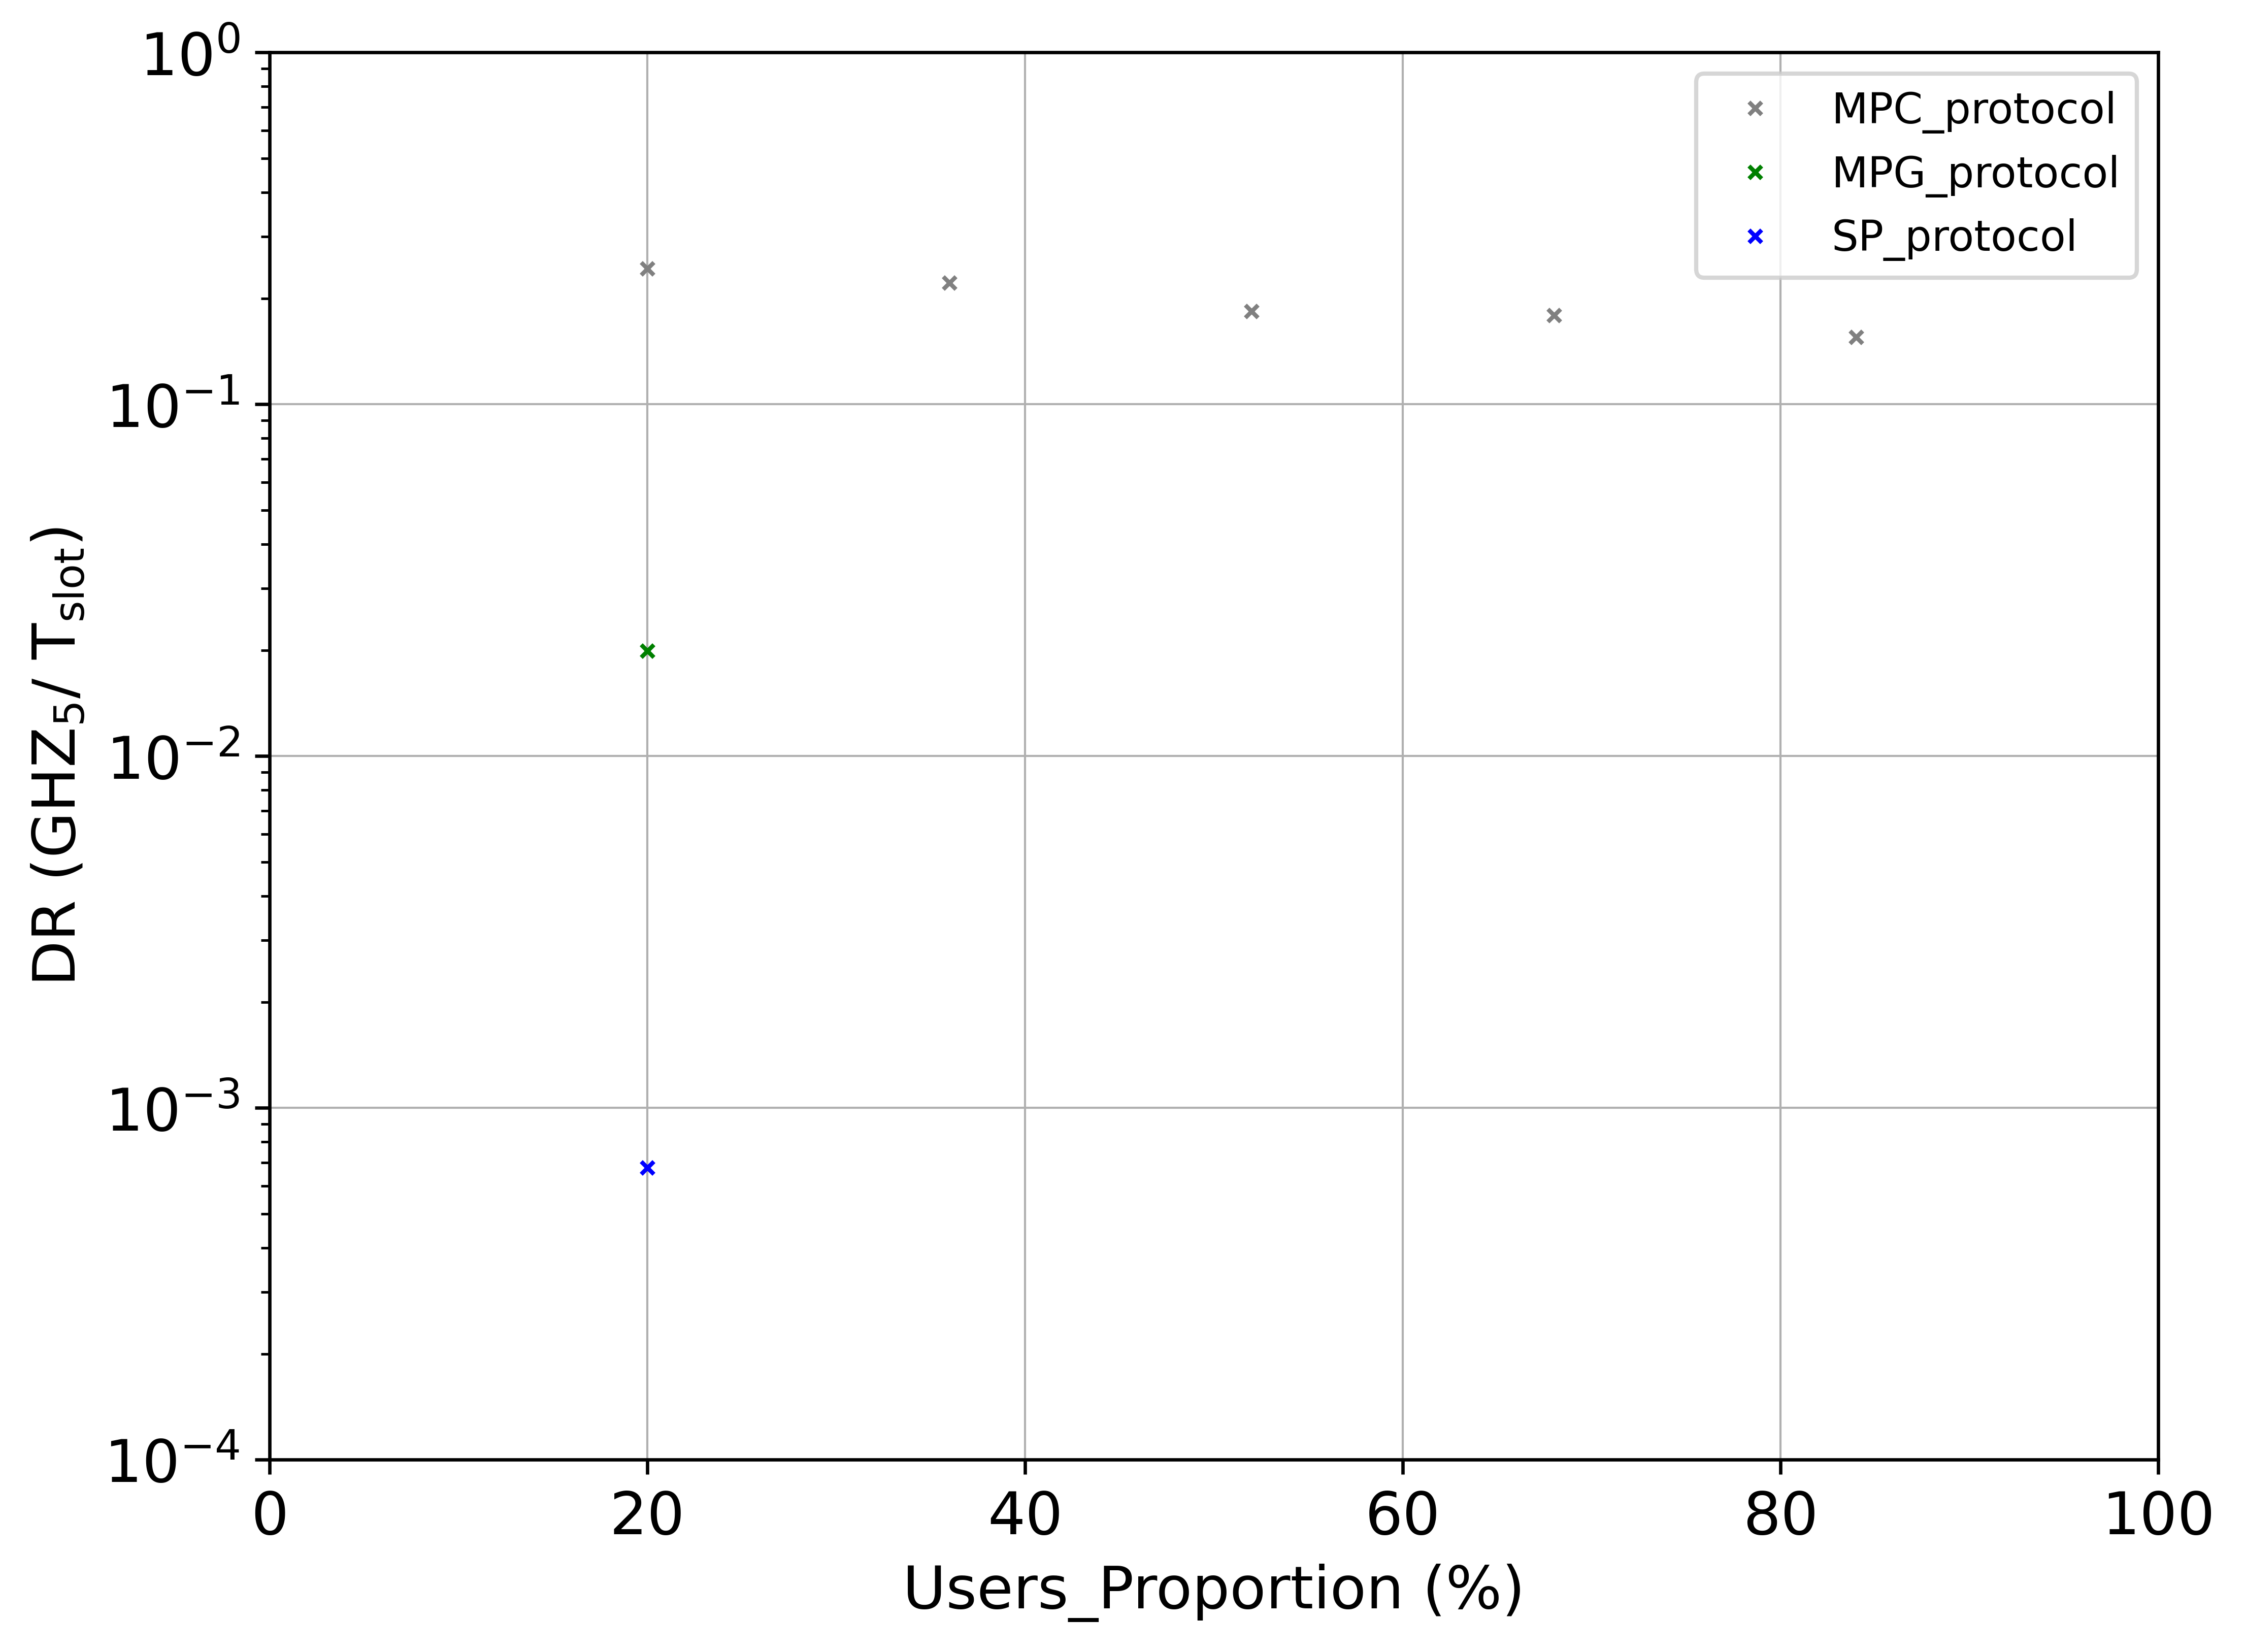

In [14]:
nom_list = [str(p).split(" ")[1] for p in protocols]
plt.figure(figsize=(8, 6), dpi=600)
plt.grid(linewidth=0.5)
for i in range(len(protocols)):
    if i == 0:
        y = plt.plot(
            [20, 36, 52, 68, 84],
            ER[i],
            color=cols[i],
            marker="x",
            linestyle="None",
            markersize=3,
            #  alpha = 0.5,
            #  linewidth=linewidth,
            label=nom_list[i],
        )
    else:
        y = plt.plot(
            [20, None, None, None, None],
            ER[i],
            color=cols[i],
            marker="x",
            linestyle="None",
            markersize=3,
            #  alpha = 0.5,
            #  linewidth=linewidth,
            label=nom_list[i],
        )        
plt.yscale("log")
plt.legend(fontsize=10)
plt.tick_params(labelsize=fontsize)

plt.xlabel("Users_Proportion (%)", fontsize=fontsize)
plt.ylabel("DR ($\mathregular{GHZ}_5/\ \\mathregular{T_{slot}}$)", fontsize=fontsize)

ax = plt.gca()
ax.set_xlim([0, 100])
ax.set_ylim([0.0001, 1])

plt.savefig("figures/DR_v_Users_Proportion.png", dpi=600)

In [7]:
# draw_options = {
#     "l": {
#         "with_labels": True,
#         "node_size": 1000,
#         "font_size": 10,
#         "label_offset": 0.25,
#         "label_size": 8
#     }, # 5x5
#     "m": {
#         "with_labels": True,
#         "node_size": 500,
#         "font_size": 8,
#         "label_offset": 0.35,
#         "label_size": 6
#     }, # 9x9
#     "s": {
#         "with_labels": False,
#         "node_size": 250,
#         "font_size": 0,
#         "label_offset": 0,
#         "label_size": 6
#     }, # 15x15
#     "xs": {
#         "with_labels": False,
#         "node_size": 80,
#         "font_size": 0,        
#         "label_offset": 0,        
#         "label_size": 4
#     } # 25x25
# }

# def draw_network(D, size="l"):
#     usage = nx.get_node_attributes(D, "usage_fraction")
#     pos = dict((n, n) for n in D.nodes())  # grid layout

#     cmap = plt.cm.Blues
#     cmap.set_under(color="white")  # display zero fraction (under 0.0000001) as white

#     nc = nx.draw(
#         D,
#         pos=pos,
#         with_labels=draw_options[size]["with_labels"],
#         node_size=draw_options[size]["node_size"],
#         font_size=draw_options[size]["font_size"],
#         node_color=list(usage.values()),
#         vmin=0.0000001,
#         cmap=cmap,
#     )

#     # colorbar
#     ax = plt.gca()
#     PCM = ax.get_children()[0]
#     cbar = plt.colorbar(PCM, ax=ax)
#     cbar.set_label(
#         "Usage fraction (/rep)", rotation=270, fontsize=12, labelpad=15
#     )

#     # usage labels
#     pos_usage = {}
#     for node, coords in pos.items():
#         pos_usage[node] = (coords[0] + draw_options[size]["label_offset"], coords[1] - draw_options[size]["label_offset"])

#     rounded_usage = {}
#     for node, attr in usage.items():
#         rounded_usage[node] = round(attr, 2)

#     nx.draw_networkx_labels(D, pos_usage, labels=rounded_usage, font_size=draw_options[size]["label_size"])

In [8]:
# draw_network(G, "l")
# plt.savefig("figures/usage.png", dpi=600, bbox_inches="tight")

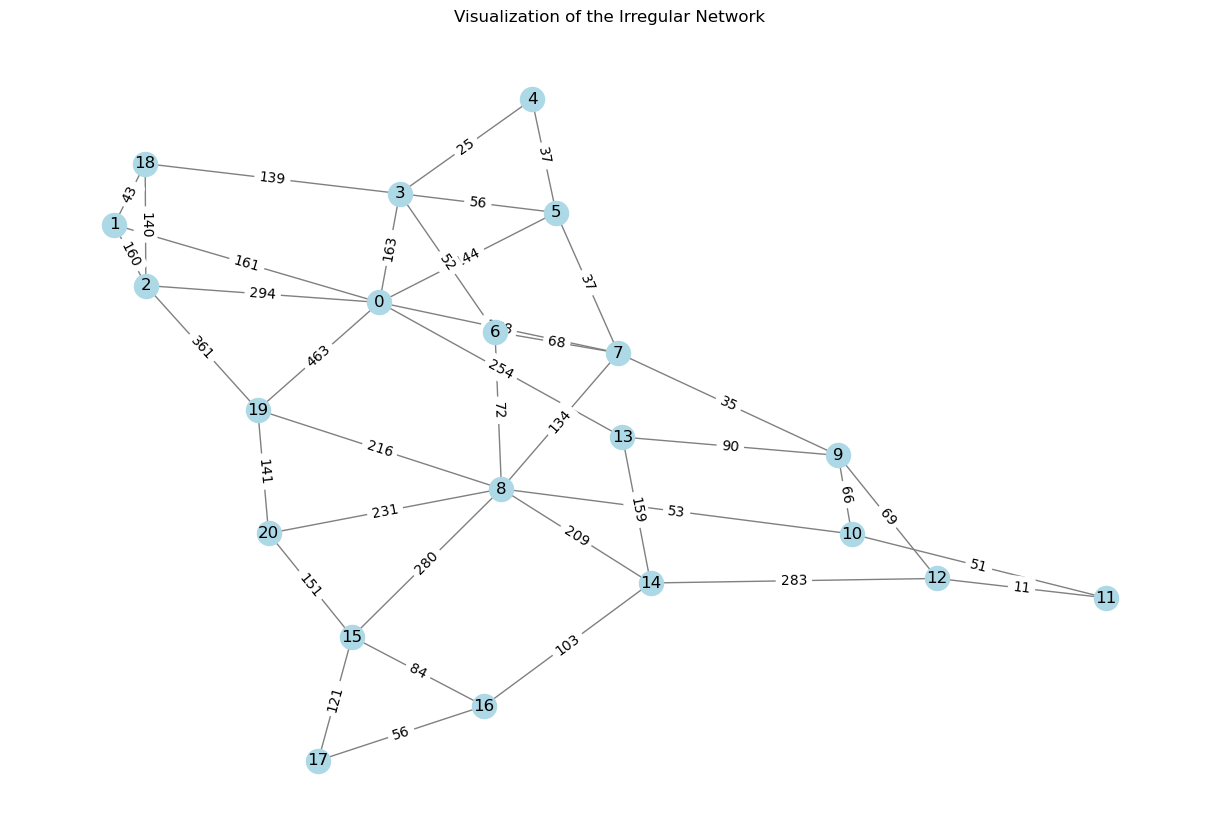

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from io import StringIO

# Data extracted from the file
data = """
src dst distance(Km)
0   1   161
0   2   294
0   3   163
0   5   144
0   7   178
0   13  254
0   19  463
1   2   160
1   18  43
2   18  140
2   19  361
3   4   25
3   5   56
3   6   52
3   18  139
4   5   37
5   7   37
6   7   68
6   8   72
7   8   134
7   9   35
8   10  53
8   14  209
8   15  280
8   19  216
8   20  231
9   10  66
9   12  69
9   13  90
10  11  51
11  12  11
12  14  283
13  14  159
14  16  103
15  16  84
15  17  121
15  20  151
16  17  56
19  20  141
"""

# Load data into a DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Create a graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'src', 'dst', ['distance(Km)'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'distance(Km)')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Visualization of the Irregular Network")
plt.axis('off')
plt.show()


In [10]:
# 计算接近中心性
closeness_centralities = nx.closeness_centrality(G)

# 将节点按接近中心性高低排序
sorted_closeness_centralities = sorted(closeness_centralities.items(), key=lambda item: item[1], reverse=True)

# 输出排序后的节点和其接近中心性
for node, centrality in sorted_closeness_centralities:
    print(f"Node {node}: {centrality}")

Node 8: 0.5555555555555556
Node 7: 0.5128205128205128
Node 0: 0.4878048780487805
Node 19: 0.47619047619047616
Node 13: 0.45454545454545453
Node 6: 0.45454545454545453
Node 14: 0.45454545454545453
Node 5: 0.425531914893617
Node 20: 0.425531914893617
Node 3: 0.4166666666666667
Node 9: 0.4166666666666667
Node 10: 0.40816326530612246
Node 2: 0.4
Node 15: 0.4
Node 12: 0.36363636363636365
Node 1: 0.3508771929824561
Node 16: 0.3448275862068966
Node 18: 0.32786885245901637
Node 4: 0.31746031746031744
Node 11: 0.3125
Node 17: 0.3076923076923077


In [11]:
# 找到中心节点，即接近中心性最高的节点
center_node = max(closeness_centralities, key=closeness_centralities.get)

# 计算中心节点到所有其他节点的最短路径长度
path_lengths = nx.shortest_path_length(G, source=center_node)

# 转换为列表并按距离排序
sorted_path_lengths = sorted(path_lengths.items(), key=lambda item: item[1], reverse=True)

# 获取距离最远的四个节点
furthest_nodes = sorted_path_lengths[:4]

# 输出结果
for node, distance in furthest_nodes:
    print(f"Node {node} is at distance {distance} from the center node {center_node}")

Node 4 is at distance 3 from the center node 8
Node 18 is at distance 3 from the center node 8
Node 1 is at distance 3 from the center node 8
Node 3 is at distance 2 from the center node 8
